In [45]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
VR = np.asarray([50, 50, 50, 60, 70, 65, 62, 60])
CR = np.asarray(['', 100] + [200]*(len(VR)-3) + [100])

c = np.rec.fromarrays([CR, VR])

CRls = np.asarray([75, 18, 54, 37, 26, 31, 34.7, 7.6])
CRhs = np.asarray([11, 3, 8, 5, 4, 4, 5, 1])

VRls = np.asarray([11, 11, 11, 24, 40, 32, 27, 24])
VRhs = np.asarray([2, 2, 2, 4, 56, 5, 4, 4])

sorted_indices = np.argsort(c)
VR   = VR[sorted_indices]
CR   = CR[sorted_indices]
CRls = CRls[sorted_indices]
CRhs = CRhs[sorted_indices]
VRls = VRls[sorted_indices]
VRhs = VRhs[sorted_indices]

print(CR,'\n',VR)

['' '100' '100' '200' '200' '200' '200' '200'] 
 [50 50 60 50 60 62 65 70]


In [57]:
SRls = [28]*len(VR)
SRhs = [4.3, 4.2, 4.0, 4.3, 4.2, 4.2, 4, 4.2]

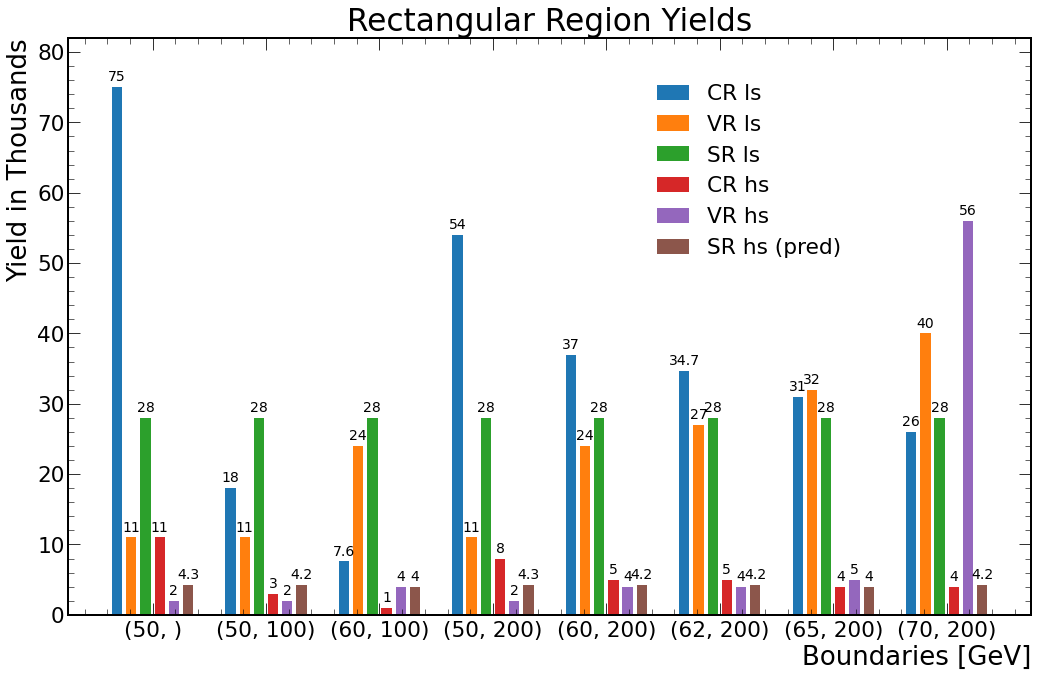

In [71]:
labels = [f"({VR_val}, {CR_val})" for VR_val, CR_val in zip(VR,CR)]

x = np.arange(len(labels))  # the label locations
pos = 1/8  # the width of the bars
width = 1/11

fig, ax = plt.subplots(figsize=(15,10))
rects4 = ax.bar(x - pos*5/2, CRls, width, label='CR ls')
rects3 = ax.bar(x - pos*3/2, VRls, width, label='VR ls')
rects5 = ax.bar(x - pos/2, SRls, width, label='SR ls')
rects1 = ax.bar(x + pos/2, CRhs, width, label='CR hs')
rects2 = ax.bar(x + pos*3/2, VRhs, width, label='VR hs')
rects6 = ax.bar(x + pos*5/2, SRhs, width, label='SR hs (pred)')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Boundaries [GeV]')
ax.set_ylabel('Yield in Thousands')
ax.set_title('Rectangular Region Yields')
ax.set_xticks(x, labels)
ax.legend(loc=(0.6,0.6))

fs = 14

ax.bar_label(rects1, padding=3, fontsize=fs)
ax.bar_label(rects2, padding=3, fontsize=fs)
ax.bar_label(rects3, padding=3, fontsize=fs)
ax.bar_label(rects4, padding=3, fontsize=fs)
ax.bar_label(rects5, padding=3, fontsize=fs)
ax.bar_label(rects6, padding=3, fontsize=fs)

ax.set_ylim(0,82)

fig.tight_layout()

plt.show()

fig.savefig('rectangular_yields.pdf', bbox_inches='tight')

In [35]:
%run ../scripts/skimRegions --cfg ../config/regionConfig.cfg --nestimators 140

[INFO] .. starting program
.. parsing command line arguments
.. parsing config file


In [36]:
BDT_dict

{'Nestimators': '140',
 'learningRate': None,
 'maxDepth': None,
 'GBsubsample': None,
 'randomState': None}

In [37]:
for hyper in BDT_dict:
    if BDT_dict[hyper] is not None:
        config['BDT'][hyper] = BDT_dict[hyper]
        print(f"Overwriting [{hyper}].")

Overwriting [Nestimators].


In [28]:
config['BDT']['Nestimators'] = '50'

In [38]:
config['BDT']['Nestimators']

'140'